# Exercise 2

Explain how a perceptron works and how to apply the gradient descent method to optimize the parameters of the perceptron.

# Perceptron: How It Works and Optimization Using Gradient Descent

## How a Perceptron Works

- A perceptron is a binary classifier that predicts the label $y \in \{0, 1\}$ based on the input $\mathbf{x} \in \mathbb{R}^n$.
- The prediction is made using the decision function:
  $$
  \hat{y} = 
  \begin{cases} 
  1 & \text{if } \mathbf{w} \cdot \mathbf{x} + b > 0, \\
  0 & \text{otherwise.}
  \end{cases}
  $$
  - $\mathbf{w}$: Weight vector.
  - $b$: Bias term.

- The hyperplane $\mathbf{w} \cdot \mathbf{x} + b = 0$ separates the two classes in the input space.

## Gradient Descent for Optimization

- Goal: Minimize a loss function to find the optimal parameters $\mathbf{w}$ and $b$.
- For the perceptron, a common loss function is:
  $$
  L(\mathbf{w}, b) = -\sum_{i} y_i (\mathbf{w} \cdot \mathbf{x}_i + b)
  $$
  for misclassified points.

- **Gradient Descent Steps**:
  1. Initialize $\mathbf{w}$ and $b$ (e.g., $\mathbf{w}_0 = \mathbf{0}$, $b_0 = 0$).
  2. Update the parameters iteratively:
     $$
     \mathbf{w} \leftarrow \mathbf{w} + \eta (y_i - \hat{y}_i) \mathbf{x}_i
     $$
     $$
     b \leftarrow b + \eta (y_i - \hat{y}_i)
     $$
     - $\eta$: Learning rate.
     - $y_i$: True label.
     - $\hat{y}_i$: Predicted label.

  3. Repeat until convergence or maximum iterations.

---



Consider the following set of data:

$$
\mathbf{x}_1 = (2, -1), y_1 = 1, \\
\mathbf{x}_2 = (-1, 1), y_2 = 0, \\
\mathbf{x}_3 = (2, 0.5), y_3 = 1, \\
\mathbf{x}_4 = (0.2, -0.2), y_4 = 0, \\
\mathbf{x}_5 = (0.5, -1), y_5 = 1, \\
\mathbf{x}_6 = (2, 1), y_6 = 0.
$$


In [1]:
import numpy as np

def perceptron(X, Y, learning_rate=0.1, n_iter=1000):
    """
    Implements the perceptron algorithm.
    
    Parameters:
    - X: ndarray of shape (n_samples, n_features), input features.
    - Y: ndarray of shape (n_samples,), target labels (must be -1 or 1).
    - learning_rate: float, the step size for weight updates.
    - n_iter: int, maximum number of iterations.
    
    Returns:
    - weights: ndarray of shape (n_features,), learned weight vector.
    - errors: list, number of misclassifications in each epoch.
    """
    # Initialize weights and errors
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    errors = []
    
    for iteration in range(n_iter):
        total_errors = 0
        
        # Iterate through each sample
        for idx in range(n_samples):
            # Calculate the predicted output
            prediction = step_activation(np.dot(X[idx], weights))
            
            # Update weights if prediction is incorrect
            update = learning_rate * (Y[idx] - prediction)
            if update != 0:
                weights += update * X[idx]
                total_errors += 1
        
        # Record the number of misclassifications
        errors.append(total_errors)
        
        # Stop early if there are no errors
        if total_errors == 0:
            break
    
    return weights, errors

def step_activation(value):
    return 1 if value >= 0 else -1


1. Construct a possible separating hyperplane by hand. Express the parameters of the hyperplane in terms of the three parameters of the perceptron.

1.0
-1.2


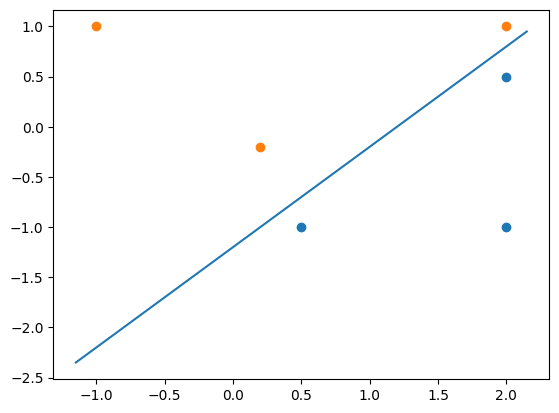

In [28]:
import matplotlib.pyplot as plt

data = np.array(
    [[2, -1, 1], [-1, 1, 0], [2, 0.5, 1], [0.2, -0.2, 0], [0.5, -1, 1], [2, 1, 0]]
)

Y = data[:, -1]
X = data[:, :-1]
X = np.column_stack([np.ones(X.shape[0]), X])


def step_activation(x):
    if x > 0:
        return 1
    return 0
params = [1.2, -1, 1]
m = -params[1] / params[2]
q = -params[0] / params[2]


print(m)
print(q)
plt.scatter(X[Y == 1, 1], X[Y == 1, 2])
plt.scatter(X[Y == 0, 1], X[Y == 0, 2])

x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max)
yy = m * xx + q
plt.plot(xx, yy)

2. Implement and apply the perceptron algorithm using:
   - Initial weight vector: $ \mathbf{w}_0 = (1, 0) $
   - Initial bias: $ b_0 = 0 $
   - Learning rate $ \eta = 2 $

   Draw the obtained hyperplane along with the data.

[[-4. ]
 [ 4.4]
 [-5.4]]
[0.81481481]
[-0.74074074]


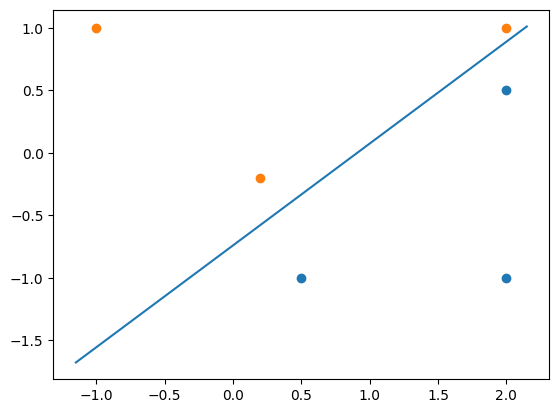

In [29]:
n_iter = 50
b = 0
w = np.array([[1.0, 0.0]]).T

params = np.row_stack([b, w])
learning_rate = 2

for jj in range(n_iter):
    j = jj % X.shape[0]
    Y_hat = step_activation(X[j] @ params)
    for i in range(len(params)):
        params[i] += learning_rate * (Y[j] - Y_hat) * X[j, i]

print(params)

m = -params[1] / params[2]
q = -params[0] / params[2]
print(m)
print(q)
plt.scatter(X[Y == 1, 1], X[Y == 1, 2])
plt.scatter(X[Y == 0, 1], X[Y == 0, 2])

x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max)
yy = m * xx + q
plt.plot(xx, yy)

3. Apply the algorithm again with $ \eta = 0.5 $. Draw the obtained hyperplane along with the data.

[[-1.  ]
 [ 0.95]
 [-1.45]]
[0.65517241]
[-0.68965517]


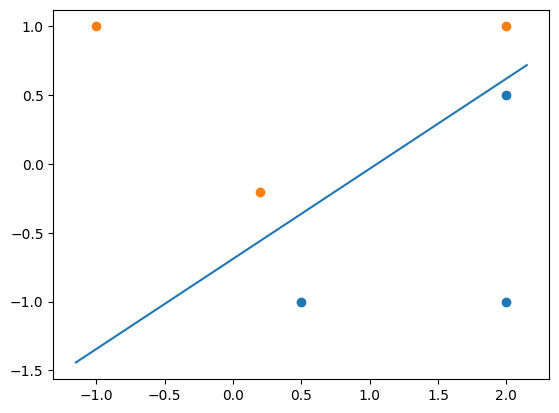

In [30]:
n_iter = 100
b = 0
w = np.array([[1.0, 0.0]]).T

params = np.row_stack([b, w])
learning_rate = 0.5

for jj in range(n_iter):
    j = jj % X.shape[0]
    Y_hat = step_activation(X[j] @ params)
    for i in range(len(params)):
        params[i] += learning_rate * (Y[j] - Y_hat) * X[j, i]

print(params)

m = -params[1] / params[2]
q = -params[0] / params[2]
print(m)
print(q)
plt.scatter(X[Y == 1, 1], X[Y == 1, 2])
plt.scatter(X[Y == 0, 1], X[Y == 0, 2])

x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max)
yy = m * xx + q
plt.plot(xx, yy)